In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Section 1:  Creating new columns and parsing strings

In [11]:
df = pd.read_csv('https://www.dropbox.com/s/0h3rmlri52s0enf/Results.csv?dl=1')

In [12]:
df.head()

,Unnamed: 0,File,Area,Density1,Density2,Density3
0,0,.\20230104_150625_450\Plate004_Well1_Object11.tif,642494,191,164,201
1,1,.\20230104_150625_450\Plate003_Well1_Object5.tif,3797429,610,467,361
2,2,.\20230104_150625_450\Plate000_Well4_Object7.tif,4098536,1124,963,662
3,3,.\20230104_150625_450\Plate005_Well3_Object6.tif,2770975,928,828,321
4,4,.\20230104_150625_450\Plate004_Well3_Object9.tif,2747875,516,472,345


This data is from a simple experiment where we have the filename, an Area in pixels, and multiple columns of "Density".  These are images of flatworms that have had the total number of TUNEL positive cells counted (Density1) the total number of H3p positive cells counted (Density3) and the Area in pixels.

### Question 1:  Get rid of the column "Density2", we will not need it

In [13]:
df.drop(['Unnamed: 0', 'Density2'], axis=1, inplace=True)

### Question 2:  Rename the column "Density1" to "TUNEL" and "Density3" to "H3p"

In [14]:
df.rename(columns={'Density1': 'TUNEL', 'Density3':'H3p'}, inplace=True)

### Question 3:  Find the ACTUAL density, and replace the "TUNEL" column to be the density (instead of the counts) and the "H3p" column to be the density (instead of the counts).  

The actual density is the number of cells divided by the area.  You will need to use the "Area" column to do this.

In [15]:
df['TUNEL'] = df['TUNEL']/df['Area'] * 1643655
df['H3p'] = df['H3p']/df['Area'] * 1643655
df

,File,Area,TUNEL,H3p
0,.\20230104_150625_450\Plate004_Well1_Object11.tif,642494,488.624182,514.206600
1,.\20230104_150625_450\Plate003_Well1_Object5.tif,3797429,264.028518,156.252942
2,.\20230104_150625_450\Plate000_Well4_Object7.tif,4098536,450.762960,265.484946
3,.\20230104_150625_450\Plate005_Well3_Object6.tif,2770975,550.460340,190.407079
4,.\20230104_150625_450\Plate004_Well3_Object9.tif,2747875,308.647948,206.363454
...,...,...,...,...
342,.\20230104_150625_450\Plate003_Well1_Object14.tif,1228691,169.891523,395.967644
343,.\20230104_150625_450\Plate004_Well2_Object17.tif,1535163,244.113062,684.158975
344,.\20230104_150625_450\Plate001_Well1_Object7.tif,4628559,306.816424,95.880132
345,.\20230104_150625_450\Plate005_Well3_Object9.tif,1766980,909.741248,202.784859


Once you have the density in terms of per pixels, convert it to per mm^2 by multiplying by 1643655

### Question 4:  Create 4 new columns, "Batch", "Plate", "Well", "Object"

Batch is the part of the file name between the two slashes.  

In [22]:
df['Batch'] = df['File'].str.split('\\').str[1]
df['Plate'] = df['File'].str.split('Plate').str[1].str[0:3].astype(int)
df['Well'] = df['File'].str.split('Well').str[1].str[0:1].astype(int)
df['Object'] = df['File'].str.split('Object').str[1].str.split('.').str[0].astype(int)

You might find that your df['Plate'] contains some leading zeros.  That is because it converted it to a string and not an integer.   Look up .astype(...) to see how to convert it to an integer (do the same for Well and Object)

# Section 2:  Merging and aggregating

In [23]:
mapper_df = pd.read_csv('https://www.dropbox.com/s/pio1ju02fswineg/Map.csv?dl=1')

In [24]:
mapper_df.head()

,Slide No.,Primary name,secondary name,Batch,Plate,Well
0,Slide1,unc-22 RNAi 5dpf,"TUNEL (CY3), H3P (Alexa-488), DAPI",20230104_150625_450,0,1
1,Slide2,Agat-1 RNAi 5dpf,"TUNEL (CY3), H3P (Alexa-488), DAPI",20230104_150625_450,0,2
2,Slide3,Agat-2 RNAi 5dpf,"TUNEL (CY3), H3P (Alexa-488), DAPI",20230104_150625_450,0,3
3,Slide4,Agat-3 RNAi 5dpf,"TUNEL (CY3), H3P (Alexa-488), DAPI",20230104_150625_450,0,4
4,Slide5,unc-22 RNAi 7dpf,"TUNEL (CY3), H3P (Alexa-488), DAPI",20230104_150625_450,1,1


### Question 1:  Use the df.merge function to merge the two dataframes together.  Use the "Batch", "Plate", "Well", and "Object" columns to merge on.  

df.merge has a "how" argument, you will need to figure out what to put there (if anything) to make sure you keep all of the df dataframe and merely add "Slide No.", "Primary name", and "secondary name" columns to it.

In [27]:
df = df.merge(mapper_df, on=['Batch', 'Plate', 'Well'], how='left')

### Question 2:  Use groupby and agg to find the count, median, and stdev for each "Primary name"

In [28]:
df.groupby(['Primary name']).agg({'TUNEL': ['mean', 'std', 'count']})

TUNEL                  
                         mean         std count
Primary name                                   
Agat-1 RNAi  2dpa  310.300376  150.079717    20
Agat-1 RNAi  4dpa  610.819690  218.187496    17
Agat-1 RNAi 10dpf  260.747914   84.186996    10
Agat-1 RNAi 5dpf   478.228803  134.076347    10
Agat-1 RNAi 6hpa   183.114426   69.200102    20
Agat-1 RNAi 7dpf   222.691808   65.650506    10
Agat-2 RNAi  2dpa  379.038528   89.591520    19
Agat-2 RNAi  4dpa  961.976106  319.180333    18
Agat-2 RNAi 10dpf  325.012522   54.303321    10
Agat-2 RNAi 5dpf   250.392640   44.782614     9
Agat-2 RNAi 6hpa   239.204691   60.643152    19
Agat-2 RNAi 7dpf   246.728039   41.029113    11
Agat-3 RNAi  2dpa  369.484088  127.440829    18
Agat-3 RNAi  4dpa  628.442133  168.575205    20
Agat-3 RNAi 10dpf  281.980099  133.176577    10
Agat-3 RNAi 5dpf   371.304474  146.669382    11
Agat-3 RNAi 6hpa   256.156864   52.752394    19
Agat-3 RNAi 7dpf   289.915356   62.890859    10
unc-22 RNAi 10dpf  276.446858  113.187332    10
unc-22 RNAi 2dpa   301.656330  111.863243    19
unc-22 RNAi 4dpa   621.941248  198.439950    19
unc-22 RNAi 5dpf   142.184387   70.211443     9
unc-22 RNAi 6hpa   215.530378   66.918427    18
unc-22 RNAi 7dpf   174.334284   58.344242    10

### Question 3:  Use .hist() on the "TUNEL" column to plot a histogram of the TUNEL density

<AxesSubplot: >

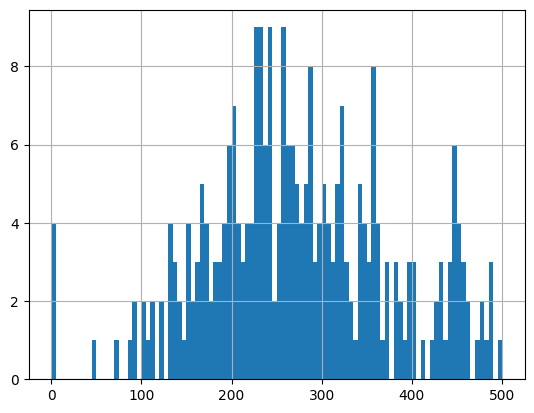

In [38]:
df['TUNEL'].hist(bins=100, range=(0, 500))

Some of the values are very low, because the image file was actually not of a worm but of a piece of junk.  Try to find a cutoff below which you suspect the TUNEL value must be junk.

### Question 4:  Use a cutoff to make a new df called filtered_df that only includes rows where the TUNEL density is above the cutoff

In [32]:
filtered_df = df[df['TUNEL']>30]

### Question 5:  Redo question 2 on filtered_df to see how much the standard deviations are impacted after filtering

In [35]:
filtered_df.groupby(['Primary name']).agg({'TUNEL': ['mean', 'std', 'count']})

TUNEL                  
                         mean         std count
Primary name                                   
Agat-1 RNAi  2dpa  326.631975  134.701416    19
Agat-1 RNAi  4dpa  610.819690  218.187496    17
Agat-1 RNAi 10dpf  260.747914   84.186996    10
Agat-1 RNAi 5dpf   478.228803  134.076347    10
Agat-1 RNAi 6hpa   192.752027   55.622114    19
Agat-1 RNAi 7dpf   222.691808   65.650506    10
Agat-2 RNAi  2dpa  379.038528   89.591520    19
Agat-2 RNAi  4dpa  961.976106  319.180333    18
Agat-2 RNAi 10dpf  325.012522   54.303321    10
Agat-2 RNAi 5dpf   250.392640   44.782614     9
Agat-2 RNAi 6hpa   239.204691   60.643152    19
Agat-2 RNAi 7dpf   246.728039   41.029113    11
Agat-3 RNAi  2dpa  369.484088  127.440829    18
Agat-3 RNAi  4dpa  628.442133  168.575205    20
Agat-3 RNAi 10dpf  313.311221   94.390463     9
Agat-3 RNAi 5dpf   408.434922   83.974442    10
Agat-3 RNAi 6hpa   256.156864   52.752394    19
Agat-3 RNAi 7dpf   289.915356   62.890859    10
unc-22 RNAi 10dpf  276.446858  113.187332    10
unc-22 RNAi 2dpa   301.656330  111.863243    19
unc-22 RNAi 4dpa   621.941248  198.439950    19
unc-22 RNAi 5dpf   142.184387   70.211443     9
unc-22 RNAi 6hpa   215.530378   66.918427    18
unc-22 RNAi 7dpf   174.334284   58.344242    10

In [34]:
filtered_df.groupby(['Primary name']).agg({'TUNEL': ['mean', 'std', 'count']}) - df.groupby(['Primary name']).agg({'TUNEL': ['mean', 'std', 'count']})

TUNEL                 
                        mean        std count
Primary name                                 
Agat-1 RNAi  2dpa  16.331599 -15.378302    -1
Agat-1 RNAi  4dpa   0.000000   0.000000     0
Agat-1 RNAi 10dpf   0.000000   0.000000     0
Agat-1 RNAi 5dpf    0.000000   0.000000     0
Agat-1 RNAi 6hpa    9.637601 -13.577988    -1
Agat-1 RNAi 7dpf    0.000000   0.000000     0
Agat-2 RNAi  2dpa   0.000000   0.000000     0
Agat-2 RNAi  4dpa   0.000000   0.000000     0
Agat-2 RNAi 10dpf   0.000000   0.000000     0
Agat-2 RNAi 5dpf    0.000000   0.000000     0
Agat-2 RNAi 6hpa    0.000000   0.000000     0
Agat-2 RNAi 7dpf    0.000000   0.000000     0
Agat-3 RNAi  2dpa   0.000000   0.000000     0
Agat-3 RNAi  4dpa   0.000000   0.000000     0
Agat-3 RNAi 10dpf  31.331122 -38.786114    -1
Agat-3 RNAi 5dpf   37.130447 -62.694940    -1
Agat-3 RNAi 6hpa    0.000000   0.000000     0
Agat-3 RNAi 7dpf    0.000000   0.000000     0
unc-22 RNAi 10dpf   0.000000   0.000000     0
unc-22 RNAi 2dpa    0.000000   0.000000     0
unc-22 RNAi 4dpa    0.000000   0.000000     0
unc-22 RNAi 5dpf    0.000000   0.000000     0
unc-22 RNAi 6hpa    0.000000   0.000000     0
unc-22 RNAi 7dpf    0.000000   0.000000     0

### Bonus question:  instead of simply filtering out the low values, try to find a way to replace them with the median value of the TUNEL density for that "Primary name"

This is a bit tricky, but it is possible to do it in one line of code.  Hint:  you will need to use .loc and a boolean mask

By the way, the previous 2 blocks were generated entirely by GPT after "Bonus question:  instead..."

In [52]:
new_df = df.copy()

In [53]:
new_df.loc[new_df['TUNEL']<30, 'TUNEL'] = filtered_df.groupby(['Primary name']).agg({'TUNEL': np.median}).reset_index().merge(new_df.loc[new_df['TUNEL']<30], on='Primary name', how='right')['TUNEL_x'].values

In [54]:
new_df[df['TUNEL']<30]

,File,Area,TUNEL,H3p,Batch,Plate,Well,Object,Slide No.,Primary name,secondary name
65,.\20230104_150625_450\Plate002_Well4_Object9.tif,62498,286.246133,26.299322,20230104_150625_450,2,4,9,Slide12,Agat-3 RNAi 10dpf,"TUNEL (CY3), H3P (Alexa-488), DAPI"
185,.\20230104_150625_450\Plate003_Well2_Object4.tif,459735,186.573975,0.000000,20230104_150625_450,3,2,4,Slide14,Agat-1 RNAi 6hpa,"TUNEL (CY3), H3P (Alexa-488), DAPI"
228,.\20230104_150625_450\Plate000_Well4_Object5.tif,371558,442.374516,0.000000,20230104_150625_450,0,4,5,Slide4,Agat-3 RNAi 5dpf,"TUNEL (CY3), H3P (Alexa-488), DAPI"
273,.\20230104_150625_450\Plate004_Well2_Object0.tif,204836,318.519384,0.000000,20230104_150625_450,4,2,0,Slide18,Agat-1 RNAi 2dpa,"TUNEL (CY3), H3P (Alexa-488), DAPI"
